<a href="https://colab.research.google.com/github/MyJstar/ArrayListTest/blob/master/%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%B6%84%EB%A5%98_aitest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***전이 학습 이미지 분류 모델 프로토 타입***

1.   한글 폰트 설치(선택 사항)
2.   이미지 다운로더 불러오기 (Bing)
3.   이미지 크롤링 모델 구현 및 이미지 크롤링과 파일 분류
4.   파이토치를 이용한 전이학습 모델 생성
5.   모델 학습



---





## **1. 한글 폰트를 먼저 설치하자**

구글 코랩 환경에서는 한글을 지원하지 않으므로 아래 코드를 먼저 실행하고
런타임 -> 다시 시작 누르기

---



In [13]:
# 한글 폰트 설치하기 (꼭! 설치가 완료되면 [런타임 다시 시작]을 누르고 다시 실행하기)
!apt install fonts-nanum -y
!pip install koreanize-matplotlib

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정하기
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
plt.rc('font', family='NanumBarunGothic')
matplotlib.font_manager._rebuild()

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 23.6 MB/s eta 0:00:00


AttributeError: ignored



---


### 2. 필요한 라이브러리 설치하기



> 이미지 다운로더를 설치한다.



In [1]:
# 필요한 라이브러리 설치하기
!git clone https://github.com/ndb796/bing_image_downloader

Cloning into 'bing_image_downloader'...
remote: Enumerating objects: 86, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 86 (delta 17), reused 10 (delta 10), pack-reused 64
Receiving objects: 100% (86/86), 17.50 KiB | 8.75 MiB/s, done.
Resolving deltas: 100% (38/38), done.



> **query_string**

*    크롤링 대상 즉 검색할 문자열 ex) 마동석, 김우빈, 신민아..


> **limit**

*   (optional, default is 100) 다운로드 할 이미지의 수


> **output_dir**

*   (optional, default is 'dataset') 출력 파일의 이름.


> **adult_filter_off**

*   (optional, default is True) 성인 필터링을 사용하지 않도록 제한


> **force_replace**

*    (optional, default is False) 폴더가 있는 경우 삭제하고 새로 다운로드를 시작


> **timeout**

*   : (optional, default is 60) 연결시간 제한.




---



### **3. 이미지 크롤링을 활용한 학습 이미지 수집**


> 수집한 이미지를 저장하기 위한 폴더를 생성하고, 필요한 함수를 정의한다.



In [2]:
import os
import shutil
from bing_image_downloader.bing_image_downloader import downloader


# 학습용 train, test 디렉토리를 나누어서 폴더 생성
directory_list = [
    './custom_dataset/train/',
    './custom_dataset/test/',
]

# 초기 디렉토리 만들기
for directory in directory_list:
    if not os.path.isdir(directory):
        os.makedirs(directory)

# dataset_split => 수집한 이미지를 학습 데이터와 평가 데이터로 구분하는 함수
def dataset_split(query, train_cnt):
    # 학습 및 평가 데이터셋 디렉토리 만들기
    for directory in directory_list:
        if not os.path.isdir(directory + '/' + query):
            os.makedirs(directory + '/' + query)
    # 학습 및 평가 데이터셋 준비하기
    cnt = 0
    for file_name in os.listdir(query):
        if cnt < train_cnt:
            print(f'[Train Dataset] {file_name}')
            shutil.move(query + '/' + file_name, './custom_dataset/train/' + query + '/' + file_name)
        else:
            print(f'[Test Dataset] {file_name}')
            shutil.move(query + '/' + file_name, './custom_dataset/test/' + query + '/' + file_name)
        cnt += 1
    shutil.rmtree(query)



---


*  <b> 특정 대상을 <b/> query로 지정하고 이미지 크롤링을 시작한다.

    limit -> 이미지 갯수

---



In [3]:
# 이미지 크롤링 대상 => 김우빈..
query = '김우빈'
downloader.download(query, limit=40,  output_dir='./', adult_filter_off=True, force_replace=False, timeout=60)
dataset_split(query, 30)


[Info] Indexing page: 1
[Info] Indexed 35 Images on Page 1.
#1 이미지 다운로드 (https://www.voguehk.com/media/2020/06/Screenshot-2020-07-15-at-8.30.23-PM.png)
#1 파일 다운로드가 완료되었습니다.
#2 이미지 다운로드 (https://i.pinimg.com/originals/bb/ca/a2/bbcaa25a7acc77eb89866c01c8dff1eb.jpg)
#2 파일 다운로드가 완료되었습니다.
#3 이미지 다운로드 (https://img.hankyung.com/photo/202106/03.26641724.1.jpg)
#3 파일 다운로드가 완료되었습니다.
#4 이미지 다운로드 (https://storage3.ilyo.co.kr/contents/article/images/2020/0312/1583948168019200.jpg)
#4 파일 다운로드가 완료되었습니다.
#5 이미지 다운로드 (https://img.sbs.co.kr/newsnet/etv/upload/2021/06/15/30000695372_1280.jpg)
#5 파일 다운로드가 완료되었습니다.
#6 이미지 다운로드 (http://image.kmib.co.kr/online_image/2020/0311/611815110014346545_1.jpg)
#6 파일 다운로드가 완료되었습니다.
#7 이미지 다운로드 (https://img.sbs.co.kr/newsnet/etv/upload/2013/10/07/30000322521_1280.jpg)
#7 파일 다운로드가 완료되었습니다.
#8 이미지 다운로드 (https://i.pinimg.com/originals/59/1a/78/591a788056df19005a91d0cb1cc68904.jpg)
#8 파일 다운로드가 완료되었습니다.
#9 이미지 다운로드 (https://img.hankyung.com/photo/201705/03.12831479.1.jpg)
#



---


**Custom_dataset에 query와 같은 폴더와 이미지가 다운된것을 볼 수 있다.**

*이어서분류할 이미지를 추가로 크롤링 한다.*


---






In [4]:
query = '신민아'
downloader.download(query, limit=40,  output_dir='./', adult_filter_off=True, force_replace=False, timeout=60)
dataset_split(query, 30)

[Info] Indexing page: 1
[Info] Indexed 35 Images on Page 1.
#1 이미지 다운로드 (https://img.asiatoday.co.kr/file/2017y/01m/23d/2017012301002183900148961.jpg)
#1 파일 다운로드가 완료되었습니다.
#2 이미지 다운로드 (http://talkimg.imbc.com/TVianUpload/tvian/TViews/image/2020/09/17/40b2674e-904a-46e4-b0ed-51e47d43729d.jpg)
#2 파일 다운로드가 완료되었습니다.
#3 이미지 다운로드 (http://digitalchosun.dizzo.com/site/data/img_dir/2019/12/23/2019122380122_0.jpg)
#3 파일 다운로드가 완료되었습니다.
#4 이미지 다운로드 (https://0.soompi.io/wp-content/uploads/2016/04/30172139/shin-minah.jpg)
#4 파일 다운로드가 완료되었습니다.
#5 이미지 다운로드 (https://www.uuoobe.kr/data/file/photo3/3739978803_7Eve8y21_5a1df64f7eb73c402a6fa4b257b2e9f4_97CGDqwJkmfHpPq.jpg)
#5 파일 다운로드가 완료되었습니다.
#6 이미지 다운로드 (https://live.staticflickr.com/65535/50366738776_f1d7fe3171_o.jpg)
#6 파일 다운로드가 완료되었습니다.
#7 이미지 다운로드 (https://0.soompi.io/wp-content/uploads/2017/07/26055114/Shin-Min-Ah-2.jpg)
#7 파일 다운로드가 완료되었습니다.
#8 이미지 다운로드 (https://file.mk.co.kr/meet/neds/2022/03/image_readtop_2022_212743_16466269384967044.jpg)
#8 파일 다

In [5]:
query = '유재석'
downloader.download(query, limit=40,  output_dir='./', adult_filter_off=True, force_replace=False, timeout=60)
dataset_split(query, 30)

[Info] Indexing page: 1
[Info] Indexed 35 Images on Page 1.
#1 이미지 다운로드 (http://img.etoday.co.kr/pto_db/2016/12/20161229090649_996588_600_900.jpg)
#1 파일 다운로드가 완료되었습니다.
#2 이미지 다운로드 (http://img.seoul.co.kr/img/upload/2018/04/14/SSI_20180414213408.jpg)
#2 파일 다운로드가 완료되었습니다.
#3 이미지 다운로드 (https://archivenew.vop.co.kr/images/78ddf9ac628c0853877cd0d4af0d3eeb/2021-05/marked/14113425_000002.jpg)
[Info] Issue getting: https://archivenew.vop.co.kr/images/78ddf9ac628c0853877cd0d4af0d3eeb/2021-05/marked/14113425_000002.jpg
[Error] <urlopen error [SSL: DH_KEY_TOO_SMALL] dh key too small (_ssl.c:1007)>
#3 이미지 다운로드 (https://image.ytn.co.kr/general/jpg/2019/1219/201912191534546373_t.jpg)
#3 파일 다운로드가 완료되었습니다.
#4 이미지 다운로드 (http://ojsfile.ohmynews.com/BIG_IMG_FILE/2017/1229/IE002265078_BIG.jpg)
#4 파일 다운로드가 완료되었습니다.
#5 이미지 다운로드 (https://pds.joongang.co.kr/news/component/htmlphoto_mmdata/202207/28/e4727123-666e-4603-a2fa-b2478b3130bd.jpg)
#5 파일 다운로드가 완료되었습니다.
#6 이미지 다운로드 (https://img.hankyung.com/photo/20170

In [6]:
query = '아이린'
downloader.download(query, limit=40,  output_dir='./', adult_filter_off=True, force_replace=False, timeout=60)
dataset_split(query, 30)

[Info] Indexing page: 1
[Info] Indexed 35 Images on Page 1.
#1 이미지 다운로드 (https://i.pinimg.com/originals/4a/88/69/4a8869fb8afde3c27723462c97e00720.jpg)
#1 파일 다운로드가 완료되었습니다.
#2 이미지 다운로드 (https://img1.daumcdn.net/thumb/R1024x0/?fname=http://cfile241.uf.daum.net/image/99CF91475F04292608BDB5)
#2 파일 다운로드가 완료되었습니다.
#3 이미지 다운로드 (https://farm5.staticflickr.com/4866/45948118112_842f38fed5_o.jpg)
#3 파일 다운로드가 완료되었습니다.
#4 이미지 다운로드 (https://img1.daumcdn.net/thumb/R1024x0/?fname=http://cfile294.uf.daum.net/image/99110F495F04292B0B90A7)
#4 파일 다운로드가 완료되었습니다.
#5 이미지 다운로드 (https://images.chosun.com/resizer/sryQzfMWPX7H3oqlsT9EYPZlKOU=/616x0/smart/cloudfront-ap-northeast-1.images.arcpublishing.com/chosun/YPHHYYYEDIVAF4JOJG7M3P3JSU.jpg)
#5 파일 다운로드가 완료되었습니다.
#6 이미지 다운로드 (https://i.pinimg.com/originals/c4/66/4c/c4664cff9cf6fb17b07b5657aa6d3c14.jpg)
#6 파일 다운로드가 완료되었습니다.
#7 이미지 다운로드 (http://www.onlifezone.com/files/attach/images/6006007/315/556/017/17965269ddf388365cdf4c388cd2399a.jpg)
#7 파일 다운로드가 완료되었습니다.
#8 



---



### 4. PyTorch를 이용한 전이 학습(Transfer Learning)


간략한 설명은 사진으로.



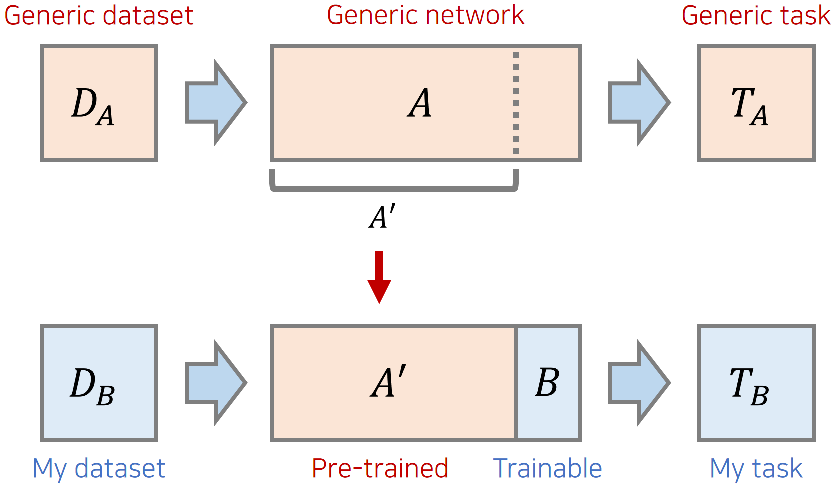
---





*   학습을 위해 필요한 라이브러리를 불러온다.




In [7]:
import torch
import torch.nn as nn
import torch.optim as optim

import torchvision
from torchvision import datasets, models, transforms

import numpy as np
import time

# 디바이스 객체 초기
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # device 객체



1.   데이터셋을 불러온다.




In [8]:
# 데이터셋을 불러올 때 사용할 변형(transformation) 객체 정의


transforms_train = transforms.Compose([
    transforms.Resize((224, 224)), # 224 X 224 크기의 해상도로 불러온다.
    transforms.RandomHorizontalFlip(), # 데이터 증진(augmentation)
    transforms.ToTensor(), # tensor객체로 변환
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # 정규화(normalization)
])

transforms_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

data_dir = './custom_dataset'
# ImageFolder로 파일에서 사진을 가져온다.
train_datasets = datasets.ImageFolder(os.path.join(data_dir, 'train'), transforms_train)
test_datasets = datasets.ImageFolder(os.path.join(data_dir, 'test'), transforms_test)

train_dataloader = torch.utils.data.DataLoader(train_datasets, batch_size=4, shuffle=True, num_workers=4)
test_dataloader = torch.utils.data.DataLoader(test_datasets, batch_size=4, shuffle=True, num_workers=4)

print('학습 데이터셋 크기:', len(train_datasets))
print('테스트 데이터셋 크기:', len(test_datasets))

class_names = train_datasets.classes
print('클래스:', class_names)

학습 데이터셋 크기: 120
테스트 데이터셋 크기: 40
클래스: ['김우빈', '신민아', '아이린', '유재석']


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(





*   이미지 시각화






In [10]:
def imshow(input, title):
    # torch.Tensor를 numpy 객체로 변환
    input = input.numpy().transpose((1, 2, 0))
    # 이미지 정규화 해제하기
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    input = std * input + mean
    input = np.clip(input, 0, 1)
    # 이미지 출력
    plt.imshow(input)
    plt.title(title)
    plt.show()


# 학습 데이터를 배치 단위로 불러오기
iterator = iter(train_dataloader)

# 현재 배치를 이용해 격자 형태의 이미지를 만들어 시각화
inputs, classes = next(iterator)
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[class_names[x] for x in classes])

NameError: ignored